In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing data for EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_train = pd.read_csv("/content/drive/MyDrive/Week-4/rossmann-store-sales/train.csv")
print(df_train.shape)
df_train.head()

(1017209, 9)


<ipython-input-21-ade6f62a9086>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("/content/drive/MyDrive/Week-4/rossmann-store-sales/train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Insuring state holiday values all are in the same datype format


In [22]:
df_train['StateHoliday'] = df_train['StateHoliday'].astype(str)


Checking for info of the data


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Changing Date object to a datetime data type


In [24]:
df_train['Date'] = pd.to_datetime(df_train['Date'])

Checking the correlation of the featurea using corr() methode


In [25]:
corr_matrix = df_train.select_dtypes(include = 'number').corr()


Plotting correlation matrix to make it more visualized


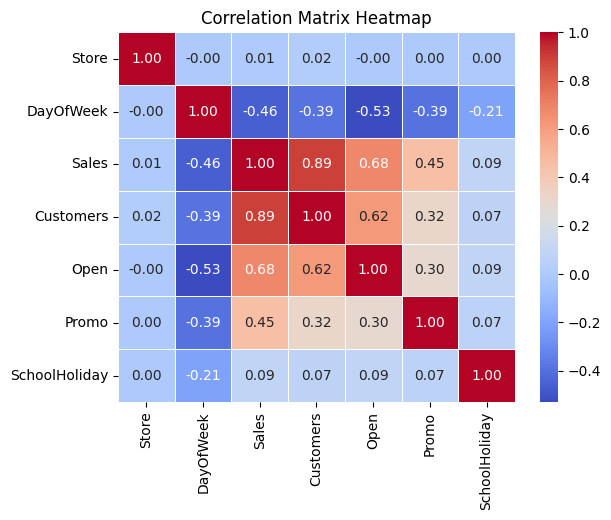

In [26]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**setting date column as index of the data and resample the data monthly **

In [27]:

df_train = df_train.set_index('Date')
# Resample numerical features using sum
monthly_numerical = df_train.select_dtypes(include='number').resample('M').sum()

<ipython-input-27-51e02c928567>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_numerical = df_train.select_dtypes(include='number').resample('M').sum()


plott of sales for each month

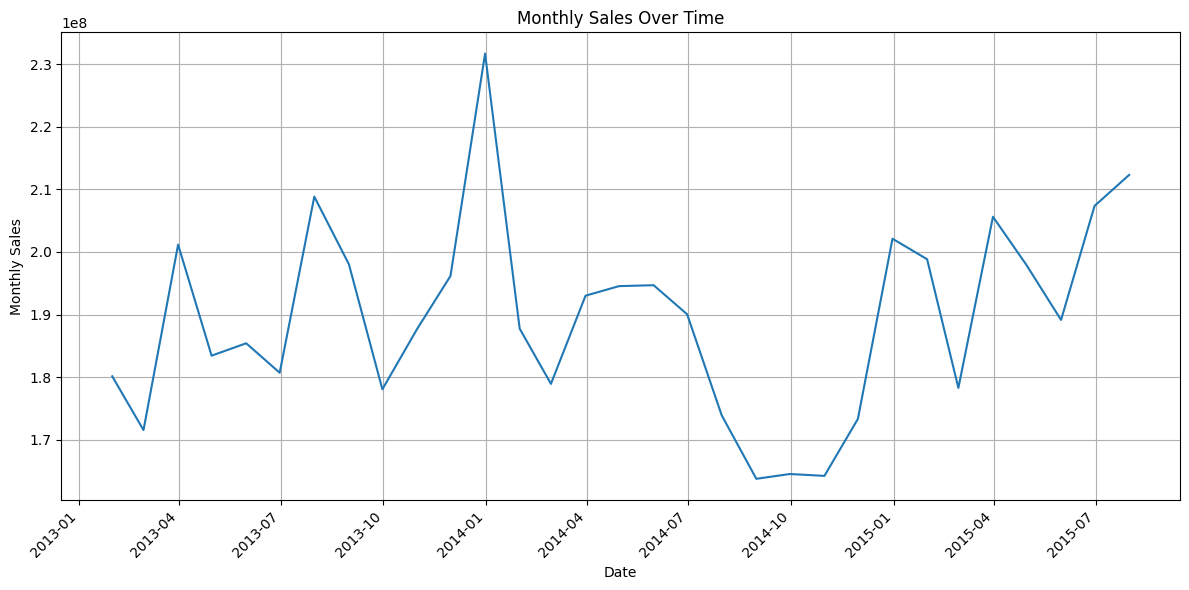

In [28]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
plt.plot(monthly_numerical.index, monthly_numerical['Sales'])
plt.xlabel('Date')
plt.ylabel('Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.grid(True)  # Add a grid for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()